# Image Classification for Identifying Cats and Dogs with CNNs

This code sets up a simple CNN for classifying images into two categories. It includes loading data, reshaping, normalizing, building, training, evaluating, and using the model to make predictions.

# Load the libraries

In [1]:
import numpy as np
import random
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten

## Load the Dataset

In [2]:
X_train = np.loadtxt('input.csv', delimiter =',')
Y_train = np.loadtxt('labels.csv', delimiter =',')

X_test = np.loadtxt('input_test.csv', delimiter =',')
Y_test = np.loadtxt('labels_test.csv', delimiter =',')

## Reshaping Data

In [3]:
X_train = X_train.reshape(len(X_train),100, 100, 3)
Y_train = Y_train.reshape(len(Y_train), 1)

X_test = X_test.reshape(len(X_test), 100, 100, 3)
Y_test = Y_test.reshape(len(Y_test), 1)

X_train = X_train/255.0
X_test = X_test/255.0

## Printing Data Shapes

In [4]:
print('Shape of X_train: ', X_train.shape)
print('Shape of Y_train: ', Y_train.shape)
print('Shape of X_test: ', X_test.shape)
print('Shape of Y_test: ', Y_test.shape)

Shape of X_train:  (2000, 100, 100, 3)
Shape of Y_train:  (2000, 1)
Shape of X_test:  (400, 100, 100, 3)
Shape of Y_test:  (400, 1)


In [5]:
X_train[1,:]

array([[[0.51372549, 0.50196078, 0.52941176],
        [0.62745098, 0.61568627, 0.64313725],
        [0.77647059, 0.75294118, 0.8       ],
        ...,
        [0.98039216, 0.97647059, 0.96862745],
        [1.        , 1.        , 0.99215686],
        [0.98039216, 0.97647059, 0.96078431]],

       [[0.54901961, 0.5372549 , 0.56470588],
        [0.49803922, 0.48627451, 0.51372549],
        [0.47058824, 0.44705882, 0.48627451],
        ...,
        [0.98431373, 0.99215686, 0.98823529],
        [0.99607843, 1.        , 0.99215686],
        [0.99607843, 1.        , 0.98431373]],

       [[0.8       , 0.79215686, 0.81176471],
        [0.73333333, 0.7254902 , 0.74509804],
        [0.57647059, 0.55686275, 0.58039216],
        ...,
        [0.97647059, 1.        , 1.        ],
        [0.93333333, 0.96862745, 0.94901961],
        [0.90980392, 0.94509804, 0.9254902 ]],

       ...,

       [[0.68235294, 0.71372549, 0.76470588],
        [0.6745098 , 0.70588235, 0.75686275],
        [0.69803922, 0

## Visualizing an Image

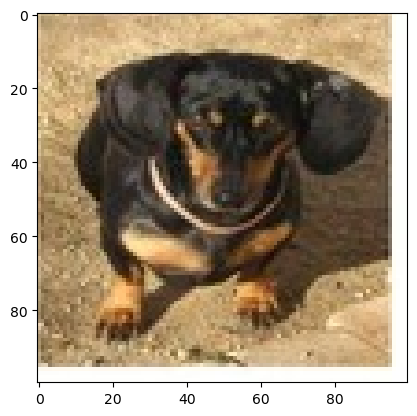

In [6]:
idx = random.randint(0, len(X_train))
plt.imshow(X_train[idx, :])
plt.show()

## Building the Model

In [7]:
model = Sequential()

model.add(Conv2D(32, (3,3), activation='relu', input_shape=(100,100,3)))
model.add(MaxPooling2D((2,2)))

model.add(Conv2D(32, (3,3), activation='relu',))
model.add(MaxPooling2D((2,2)))

model.add(Flatten()),
model.add(Dense(64, activation ='relu'))
model.add(Dense(1, activation ='sigmoid'))

C:\Users\admin\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


## Compiling the Model

In [8]:
model.compile(loss = 'binary_crossentropy', optimizer ='adam', metrics =['accuracy'])

## Training the Model

In [9]:
model.fit(X_train, Y_train, epochs =5, batch_size =64)

Epoch 1/5
32/32 ━━━━━━━━━━━━━━━━━━━━ 9s 209ms/step - accuracy: 0.4962 - loss: 0.7484
Epoch 2/5
32/32 ━━━━━━━━━━━━━━━━━━━━ 7s 203ms/step - accuracy: 0.5633 - loss: 0.6795
Epoch 3/5
32/32 ━━━━━━━━━━━━━━━━━━━━ 6s 181ms/step - accuracy: 0.6633 - loss: 0.6277
Epoch 4/5
32/32 ━━━━━━━━━━━━━━━━━━━━ 8s 236ms/step - accuracy: 0.7392 - loss: 0.5364
Epoch 5/5
32/32 ━━━━━━━━━━━━━━━━━━━━ 8s 242ms/step - accuracy: 0.7868 - loss: 0.4715


In [10]:
model.fit(X_train, Y_train, epochs =5, batch_size =64)

Epoch 1/5
32/32 ━━━━━━━━━━━━━━━━━━━━ 8s 235ms/step - accuracy: 0.8372 - loss: 0.3906
Epoch 2/5
32/32 ━━━━━━━━━━━━━━━━━━━━ 10s 220ms/step - accuracy: 0.8535 - loss: 0.3389
Epoch 3/5
32/32 ━━━━━━━━━━━━━━━━━━━━ 7s 209ms/step - accuracy: 0.8695 - loss: 0.2890
Epoch 4/5
32/32 ━━━━━━━━━━━━━━━━━━━━ 6s 179ms/step - accuracy: 0.9136 - loss: 0.2163
Epoch 5/5
32/32 ━━━━━━━━━━━━━━━━━━━━ 6s 181ms/step - accuracy: 0.9536 - loss: 0.1592


## Evaluating the Model

In [11]:
model.evaluate(X_test, Y_test)

13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - accuracy: 0.6908 - loss: 0.7873


[0.8401681184768677, 0.6949999928474426]

## Visualizing a Test Image and Predicting

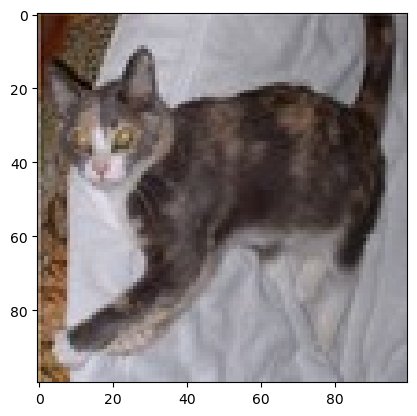

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 166ms/step
This is a : Cat


In [12]:
idx2 = random.randint(0, len(Y_test))
plt.imshow(X_test[idx2, :])
plt.show()

y_pred = model.predict(X_test[idx2, :].reshape(1, 100, 100, 3))
y_pred = y_pred > 0.5


if (y_pred == 0):
    pred = "Dog"
else:
    pred = "Cat"
    
print("This is a :",pred)

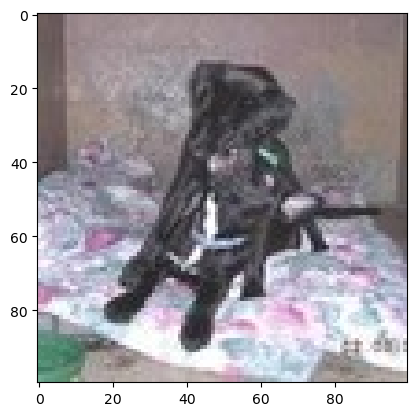

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
This is a : Dog


In [13]:
idx2 = random.randint(0, len(Y_test))
plt.imshow(X_test[idx2, :])
plt.show()

y_pred = model.predict(X_test[idx2, :].reshape(1, 100, 100, 3))
y_pred = y_pred > 0.5


if (y_pred == 0):
    pred = "Dog"
else:
    pred = "Cat"
    
print("This is a :",pred)

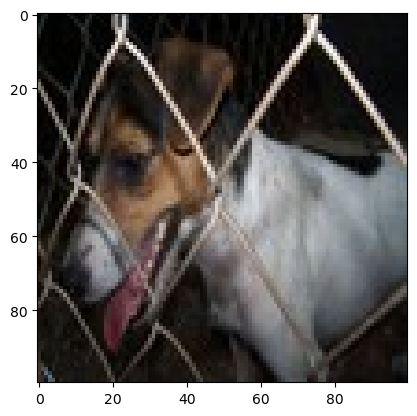

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
This is a : Dog


In [14]:
idx2 = random.randint(0, len(Y_test))
plt.imshow(X_test[idx2, :])
plt.show()

y_pred = model.predict(X_test[idx2, :].reshape(1, 100, 100, 3))
y_pred = y_pred > 0.5


if (y_pred == 0):
    pred = "Dog"
else:
    pred = "Cat"
    
print("This is a :",pred)

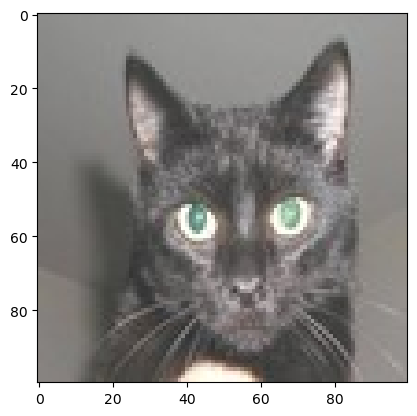

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
This is a : Cat


In [15]:
idx2 = random.randint(0, len(Y_test))
plt.imshow(X_test[idx2, :])
plt.show()

y_pred = model.predict(X_test[idx2, :].reshape(1, 100, 100, 3))
y_pred = y_pred > 0.5


if (y_pred == 0):
    pred = "Dog"
else:
    pred = "Cat"
    
print("This is a :",pred)

## Conclusion

In this project, we successfully developed a Convolutional Neural Network (CNN) for binary image classification, distinguishing between cats and dogs. The model was trained on image data after preprocessing, which included reshaping and normalization. We evaluated the model's performance using accuracy and loss metrics, achieving reasonable results. The CNN demonstrated its ability to classify images effectively, though further improvements can be made by experimenting with different architectures, hyperparameters, or additional data. This project highlights the potential of deep learning in image classification tasks and serves as a foundation for more advanced applications in computer vision.